<a href="https://colab.research.google.com/github/Hands-On-Fraud-Analytics/Chapter-15-Clustering-for-Fraud-Detection/blob/main/Chapter_15_Clustering_for_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 15: Clustering for Fraud Detection**

# **Defining Normal Behavior**

## **Import Initial Libraries**

In [6]:
# Import Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## **Import Datasets**

In [7]:
# Let's read a CSV file using Pandas as follows
banksim_df = pd.read_csv('banksim.csv')
banksim_df

,Unnamed: 0,age,gender,category,amount,fraud
0,171915,3,F,es_transportation,49.7100,0
1,426989,4,F,es_health,39.2900,0
2,310539,3,F,es_transportation,18.7600,0
3,215216,4,M,es_transportation,13.9500,0
4,569244,2,M,es_transportation,49.8700,0
...,...,...,...,...,...,...
7195,260136,5,M,es_hotelservices,236.1474,1
7196,56643,5,F,es_hotelservices,139.6000,1
7197,495817,1,F,es_travel,236.1474,1
7198,333170,1,M,es_hotelservices,236.1474,1


## **Perform Exploratory Data Analysis (EDA)**

In [ ]:
# Obtain a Statistical Summary about the data
banksim_df.describe()

,Unnamed: 0,amount,fraud
count,7200.000000,7200.000000,7200.000000
mean,296228.038472,36.981587,0.027778
std,172094.972083,40.569355,0.164347
min,13.000000,1.099800,0.000000
25%,145611.250000,14.430000,0.000000
50%,295031.500000,28.020000,0.000000
75%,445221.500000,44.215000,0.000000
max,594622.000000,236.147400,1.000000


In [ ]:
# Obtain the summary of the dataframe data types
banksim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7200 non-null   int64  
 1   age         7200 non-null   object 
 2   gender      7200 non-null   object 
 3   category    7200 non-null   object 
 4   amount      7200 non-null   float64
 5   fraud       7200 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 337.6+ KB


## **Practice Opportunity 1: Customer Segmentation**

In this exercise, you will analyze client trends in the dataset to determine if data segmentation into distinct groups is necessary, or if the dataset exhibits homogeneity.
Unfortunately, the dataset provides limited client information, such as wealth levels. However, it does include age data, which will be the focus of our analysis to discern behavioral differences across age groups.

Instructions:
- Import the Pandas library and use it to read the dataset from a CSV file.
- Store the resulting dataframe in banksim_df
- Obtain a statistical overview of the dataset to familiarize yourself with its characteristics.
- Group the data by the 'category' column and calculate the mean for each group. This will give insights into the average behavior per category.
- Group the dataset by the 'age' column and calculate the mean for each age group to understand average behaviors.
- Use value_counts() on the 'age' column to assess the age distribution within the dataset.


In [8]:
# Group by categories and take the mean of only numeric columns
print(banksim_df.groupby('category').mean(numeric_only=True))

                          Unnamed: 0      amount     fraud
category                                                  
es_barsandrestaurants  267372.707865   43.841793  0.022472
es_contents            335906.153846   55.170000  0.000000
es_fashion             286952.226804   59.780769  0.020619
es_food                334978.976190   35.216050  0.000000
es_health              335355.176955  126.604704  0.242798
es_home                248312.583333  120.688317  0.208333
es_hotelservices       280138.548387  172.756245  0.548387
es_hyper               244440.712500   46.788180  0.125000
es_leisure             186541.307692  229.757600  1.000000
es_otherservices       241279.000000  149.648960  0.600000
es_sportsandtoys       238775.539474  157.251737  0.657895
es_tech                310473.948718  132.852862  0.179487
es_transportation      295733.881674   27.422014  0.000000
es_travel              338897.777778  231.818656  0.944444
es_wellnessandbeauty   275085.979798   66.167078  0.0606

In [ ]:
# Count the values of the observations in each age group
print(banksim_df['category'].value_counts())

es_transportation        5975
es_food                   294
es_health                 243
es_wellnessandbeauty      198
es_fashion                 97
es_barsandrestaurants      89
es_hyper                   80
es_sportsandtoys           76
es_tech                    39
es_hotelservices           31
es_home                    24
es_travel                  18
es_contents                13
es_leisure                 13
es_otherservices           10
Name: category, dtype: int64


In [9]:
# Group by age groups and get the mean of only numeric columns
print(banksim_df.groupby('age').mean(numeric_only=True))

        Unnamed: 0     amount     fraud
age                                    
0    327520.450000  49.468935  0.050000
1    290985.509116  35.622829  0.026648
2    296867.958851  37.228665  0.028718
3    291471.417346  37.279338  0.023283
4    306041.396403  36.197985  0.035966
5    290885.960859  37.547521  0.023990
6    299193.716561  36.700852  0.022293
U    288372.181818  39.117000  0.000000


In [ ]:
# Count the values of the observations in each age group
print(banksim_df['age'].value_counts())


 2       2333
 3       1718
 4       1279
 5        792
 1        713
 6        314
 -         40
 U         11
Name: age, dtype: int64


## **Practice Opportunity 2: Examining Statistics to Identify Normal Behavior:**

In the previous exercises, you discovered that fraud is more common in specific transaction categories, but there wasn't a clear way to segment our data, such as by age groups. Now, let's explore the average amounts spent in normal transactions compared to fraudulent transactions. This will help you understand how fraudulent transactions structurally differ from normal transactions.

- Make two new dataframes: one for fraud observations and one for non-fraud observations. To create the additional dataframes, use.loc to locate the data in the df DataFrame and set criteria "where fraud is 1" and "where fraud is 0".

- Plot the amount column of the newly produced dataframes using histogram plot functions and label the plots 'fraud' and 'non fraud'.


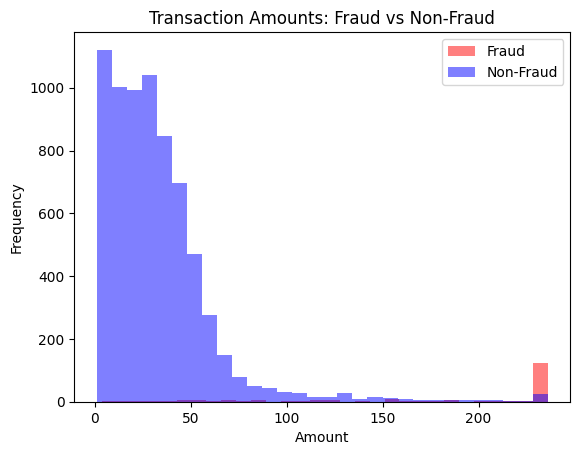

In [ ]:
import matplotlib.pyplot as plt

# Create two dataframes with fraud and non-fraud data
banksim_df_fraud = banksim_df.loc[banksim_df['fraud'] == 1]
banksim_df_non_fraud = banksim_df.loc[banksim_df['fraud'] == 0]

# Adjusting the histogram with different colors for clarity
plt.hist(banksim_df_fraud['amount'], alpha=0.5, label='Fraud', bins=30, color='red')
plt.hist(banksim_df_non_fraud['amount'], alpha=0.5, label='Non-Fraud', bins=30, color='blue')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.title('Transaction Amounts: Fraud vs Non-Fraud')
plt.show()


# **Clustering for Fraud Detection**

## **Practice Opportunity 3: Task 1: Scaling the Data**

**Scaling the data:**

For ML algorithms using distance based metrics, it is crucial to always scale your data, as features using different scales will distort your results. K-means uses the Euclidian distance to assess distance to cluster centroids, therefore you first need to scale your data before continuing to implement the algorithm. Let's do that first.

Available is the dataframe df from the previous exercise, with some minor data preparation done so it is ready for you to use with sklearn. The fraud labels are separately stored under labels, you can use those to check the results later. numpy has been imported as np.

- Import the MinMaxScaler.
- Transform your dataframe df into a numpy array X by taking only the values of df and make sure you have all float values.
- Apply the defined scaler onto X to obtain scaled values of X_scaled to force all your features to a 0-1 scale.

In [10]:
# Import the scaler and numpy libraries
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Let's read a CSV file using Pandas as follows
banksim_df = pd.read_csv('banksim.csv')

# Filter only numeric columns
numeric_columns = banksim_df.select_dtypes(include=[np.number]).columns
numeric_df = banksim_df[numeric_columns]

# Convert the dataframe to a numpy array of type float
X = numeric_df.values.astype(float)

# Instantiate the scaler
scaler = MinMaxScaler()

# Apply the scaler to the data
X_scaled = scaler.fit_transform(X)


## **Practice Opportunity 3: Task 2: K-means Clustering**

**K-means clustering**

A very commonly used clustering algorithm is **K-means clustering**. For fraud detection, K-means clustering is straightforward to implement and relatively powerful in predicting suspicious cases. It is a good algorithm to start with when working on fraud detection problems. However, fraud data is oftentimes very large, especially when you are working with transaction data. **MiniBatch K-means**is an **efficient** way to implement K-means on a large dataset, which you will use in this exercise.

The scaled data from the previous exercise, X_scaled is available. Let's give it a try.

1.	Import MiniBatchKMeans from sklearn.cluster.
2.	Initialize the MiniBatch K-means model, specifying 8 clusters. Set a random state for reproducibility if desired.
3.	Fit the model to the scaled data, X_scaled.


In [11]:
from sklearn.cluster import MiniBatchKMeans

# Initialize MiniBatch K-means model with 8 clusters and explicitly set n_init
kmeans = MiniBatchKMeans(n_clusters=8, n_init=3, random_state=0)  # Change n_init to 'auto' if you prefer

# Fit the model to the scaled data
kmeans.fit(X_scaled)


MiniBatchKMeans(n_init=3, random_state=0)

## **Practice Opportunity 3: Task 3: Elbow Method**

**Elbow method:**

In the previous exercise you've implemented MiniBatch K-means with 8 clusters, without actually checking what the right amount of clusters should be. For our first fraud detection approach, it is important to **get the number of clusters** right, especially when you want to use the outliers of those clusters as fraud predictions. To decide which amount of clusters you're going to use, let's apply the **Elbow method** and see what the optimal number of clusters should be based on this method.

**X_scaled** is again available for you to use and **MiniBatchKMeans** has been imported from **sklearn**.

- Define the range to be between 1 and 5 clusters.
- Run MiniBatch K-means on all the clusters in the range using list comprehension.
- Fit each model on the scaled data and obtain the scores from the scaled data.
- Plot the cluster numbers and their respective scores, it will take a few seconds to run.

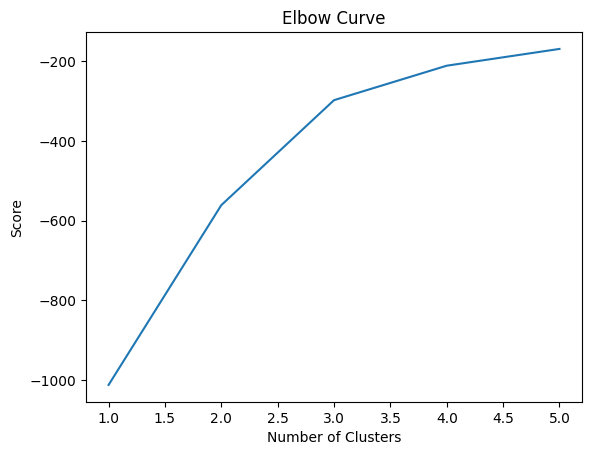

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Define the range of clusters to try
clustno = range(1, 6)  # Adjusted to include 5 clusters

# Create MiniBatch K-means models for each number of clusters, setting n_init explicitly
kmeans = [MiniBatchKMeans(n_clusters=i, n_init=3, random_state=0) for i in clustno]

# Fit each model and calculate the score
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the Elbow Curve
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


## **Optional: Testing Your Knowledge: Apply the Elbow Method using the KMeans algorithm from the scikit-learn library:**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer


In [ ]:
creditcard_df = pd.read_csv('credit_card.csv')

In [ ]:
# Check the shape of the dataframe
creditcard_df.shape

(8950, 18)

In [ ]:
# Display the feature columns
creditcard_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
# Obtain the summary of the dataframe data types
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**The DataFrame contains a total of 18 columns and 8,950 entries. The data types and their counts are as follows:**

- Object Type Column: 1 column: This column is typically for categorical or string data.

- Float Type Columns: 14 columns: These columns generally represent quantitative aspects and continuous variables.

- Integer Type Columns: 3 columns: These columns likely represent counts or other integer-valued data.

***Regarding missing values in the dataset:***

**Missing Values:** There is 1 missing value in the CREDIT_LIMIT column.
There are 313 missing values in the MINIMUM_PAYMENTS column.
The dataset is predominantly complete with most columns having no missing values, indicating a high degree of data completeness with only a few missing entries in the two aforementioned columns.

In [ ]:
print(creditcard_df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


### **Missing values:**

- MINIMUM_PAYMENT
- CREDIT_LIMIT

In [ ]:
# Let's drop Customer ID since it has no meaning here
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
credit_card_imputed = imputer.fit_transform(creditcard_df)

# Note that this code will cause an error if we do not remove "CUST_ID" as it is a string column.

In [ ]:
credit_card_imputed_df = pd.DataFrame(credit_card_imputed, columns=creditcard_df.columns)

In [ ]:
print(credit_card_imputed_df.isnull().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
inertias = []
K_range = range(1, 11)
for K in K_range:
    kmeans = KMeans(n_clusters=K, n_init=10, random_state=42)
    kmeans.fit(credit_card_imputed)
    inertias.append(kmeans.inertia_)


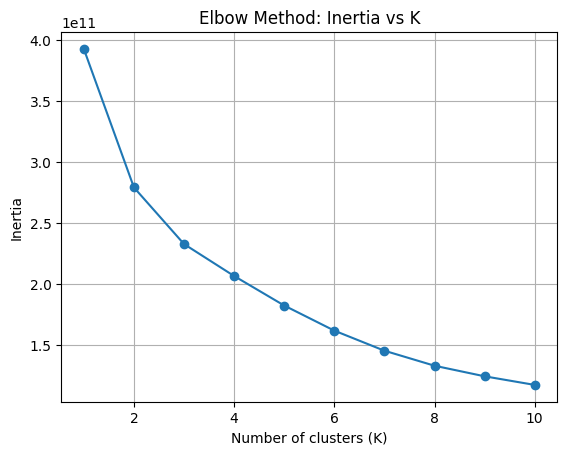

In [ ]:
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method: Inertia vs K')
plt.grid(True)
plt.show()


## **Practice Opportunity 4: Detecting Outliers**

In the next exercises, we will use the K-means algorithm to detect fraud and validate the results by comparing the predictions to the saved labels. The method commonly used to identify fraudulent transactions involves marking the observations that are farthest from the cluster centroid as suspicious. This exercise will show you how to do it and identify the threshold that will be used to confirm the results in the future exercise. You can access the scaled observations X_scaled as well as the labels kept in the variable y.

Instructions:

- Split the scaled data and labels y into a training and testing set.
- Create a MiniBatch K-means model with three clusters and fit it to the training data.
- Obtain the cluster predictions from the test data and determine the cluster centroids.
- Set the threshold for identifying fraud as 95% of the distance distribution and above.


## **1- Import the important library and load the dataset**

In [13]:
import pandas as pd

# Load the dataset into a DataFrame
banksim_df = pd.read_csv('banksim.csv')

# Display the first few rows of the dataframe
banksim_df.head()


,Unnamed: 0,age,gender,category,amount,fraud
0,171915,3,F,es_transportation,49.71,0
1,426989,4,F,es_health,39.29,0
2,310539,3,F,es_transportation,18.76,0
3,215216,4,M,es_transportation,13.95,0
4,569244,2,M,es_transportation,49.87,0


## **2- Preprocessing the dataset**

The dataset **banksim_df** contains several columns, including **age, gender, category, amount**, and **fraud**. Before proceeding with the analysis, it's important to identify the scaled observations (X_scaled) and the labels (y). You assume **fraud** is the label (y) and the remaining columns, except for any non-numeric or identifier columns, are the features that need to be scaled.

You'll proceed with the following steps:

1. Preprocess the data: This includes encoding categorical features if present and scaling the numeric features.
2. Split the data into training and testing sets.
3. Create and fit a MiniBatch K-means model with three clusters to the training data.
4. Obtain cluster predictions from the test data and determine the cluster centroids.
5. Set a threshold for identifying fraud as 95% of the distance distribution and above.

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Identifying the numeric and categorical columns
numeric_features = ['amount']
categorical_features = ['age', 'gender', 'category']

# Create a ColumnTransformer with StandardScaler for numeric features and OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Separating the features (X) and the target label (y)
X = banksim_df.drop(columns=['fraud', 'Unnamed: 0'])  # 'Unnamed: 0' seems to be an identifier column
y = banksim_df['fraud']

# Applying the transformations to the features
X_scaled = preprocessor.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5040, 28), (2160, 28), (5040,), (2160,))

Now the data has been successfully preprocessed, and the features have been scaled. you've also split the data into training and testing sets, with 5040 observations in the training set and 2160 in the testing set.

## **3- Create and fit a MiniBatch K-means model**

Next, you'll create and fit a MiniBatch K-means model with three clusters to the training data. After fitting the model, you'll use it to obtain cluster predictions from the test data and determine the cluster centroids. Finally, you'll set a threshold for identifying fraud as 95% of the distance distribution and above.

In [15]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np

# Create a MiniBatch K-means model with three clusters and explicitly set n_init
kmeans = MiniBatchKMeans(n_clusters=3, n_init=3, random_state=42)  # You can change n_init to 'auto' if you prefer

# Fit the model to the training data
kmeans.fit(X_train)

# Obtain cluster predictions from the test data
test_clusters = kmeans.predict(X_test)

# Determine the cluster centroids
centroids = kmeans.cluster_centers_

# Calculate the distance of each point in the test set from its cluster centroid
distances = np.linalg.norm(X_test - centroids[test_clusters], axis=1)

# Set the threshold for identifying fraud as 95% of the distance distribution and above
threshold = np.percentile(distances, 95)

print(threshold)


1.8029151154454


The threshold for identifying potential fraud transactions has been set at approximately 1.803. This value represents the 95th percentile of the distance distribution from each point in the test set to its respective cluster centroid. Transactions in the test set that have a distance greater than this threshold to their respective cluster centroid can be flagged as potential outliers or suspicious for fraud.

# **Practice Opportunity 5: Checking Model Results**

Model Performance Evaluation In the previous exercise, you flagged all observations as fraud if they were in the top 5th percentile in distance from the cluster centroid, meaning these are the extreme outliers of the three clusters. You already have the scaled data and labels separated into training and test sets for this experiment, so *y_test* is available. The prior exercise's forecasts, *fraud_predictions*, are also available. Let's compute some performance measures to see how well the model did.

Instructions:

- Compute the area under the ROC curve using the test labels and predicted labels.
- Calculate the confusion matrix using the test labels and predicted labels, and then visualize the results.


To evaluate the model's performance, we'll follow these steps:

1. Flag observations as fraud if they are in the top 5th percentile in distance from the cluster centroid. These predictions will be stored in fraud_predictions.
2. Compute the area under the ROC curve (AUC) using the test labels (y_test) and the predicted labels (fraud_predictions).
3. Calculate and visualize the confusion matrix using the test labels and predicted labels.

Now start by flagging the observations as fraud based on the threshold you determined earlier and then proceed with the performance evaluation.

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Flag as fraud based on the threshold
fraud_predictions = np.where(distances > threshold, 1, 0)

# Compute ROC AUC and confusion matrix
roc_auc = roc_auc_score(y_test, fraud_predictions)
conf_matrix = confusion_matrix(y_test, fraud_predictions)

roc_auc, conf_matrix


(0.7108451320975041,
 array([[2024,   84],
        [  28,   24]]))

The area under the ROC curve (AUC) for the model is approximately 0.711, indicating a moderate level of performance in distinguishing between the fraudulent and non-fraudulent transactions.

The confusion matrix is as follows:

- True Negatives (Correctly identified as non-fraud): 2024
- False Positives (Incorrectly identified as fraud): 84
- False Negatives (Incorrectly identified as non-fraud): 28
- True Positives (Correctly identified as fraud): 24

<Figure size 800x600 with 0 Axes>

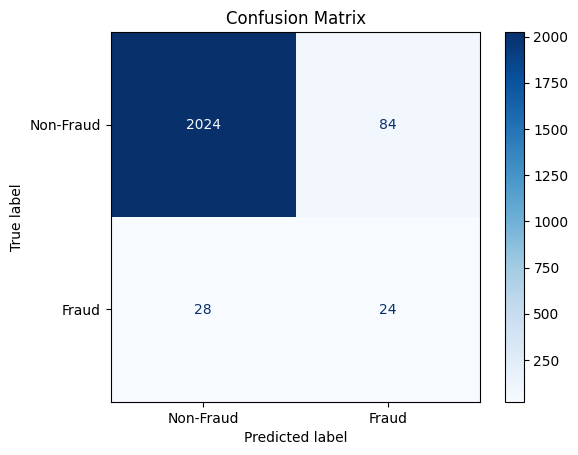

In [ ]:
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Fraud', 'Fraud']).plot(values_format='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


The above is the visual representation of the confusion matrix. It provides a clear view of how the model performed in terms of correctly and incorrectly classifying transactions as fraud or non-fraud. As seen, the model has a relatively higher number of true negatives and a modest number of true positives, with some false positives and false negatives.

# **Practice Opportunity 6: Detecting Outliers Using DBSCAN**

You can adapt the existing process to use DBSCAN (Density-Based Spatial Clustering of Applications with Noise) instead of K-means. DBSCAN is a density-based clustering algorithm that doesn't require specifying the number of clusters beforehand, and it can identify outliers as points in low-density regions.

Here's how we can modify the process:

1. Create and fit a DBSCAN model to the training data.
2. Identify core samples and noise points (outliers) in the test data.
3. Since DBSCAN doesn't use centroids like K-means, you'll identify the outliers directly based on the DBSCAN labels.

Let's proceed with these steps.

In [ ]:
from sklearn.cluster import DBSCAN

# Create and fit a DBSCAN model to the training data
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(X_train)

# Identify core samples and noise points in the test data using DBSCAN
test_labels = dbscan.fit_predict(X_test)

# Identifying the outliers (noise points) - Outliers will be labeled as 1 (potential fraud) and others as 0 (non-fraud)
dbscan_y_pred = np.where(test_labels == -1, 1, 0)

dbscan_y_pred.sum(), dbscan_y_pred.shape


(369, (2160,))

The DBSCAN algorithm has been applied to the test data. Out of the 2160 transactions in the test set, 369 have been identified as outliers, which could potentially be considered as suspicious or fraudulent transactions according to the DBSCAN model.

DBSCAN labels data points as -1 if they are considered noise (or outliers in this context). These have been flagged as potential fraud (labelled as 1), while the rest are considered non-fraudulent (labelled as 0).

## **Checking Model Results**

In [ ]:
# It seems the previous imports were lost. I will re-import the necessary libraries and re-run the calculations.
from sklearn.metrics import roc_auc_score, confusion_matrix

# Compute the area under the ROC curve using the test labels and predicted labels
roc_auc_dbscan = roc_auc_score(y_test, dbscan_y_pred)

# Calculate the confusion matrix using the test labels and predicted labels
conf_matrix_dbscan = confusion_matrix(y_test, dbscan_y_pred)

roc_auc_dbscan, conf_matrix_dbscan


(0.9248102466793169,
 array([[1791,  317],
        [   0,   52]]))

The performance evaluation of the DBSCAN model yields the following results:

Area under the ROC Curve (AUC): Approximately 0.925, which is quite high. This indicates a strong ability of the DBSCAN model to distinguish between fraudulent and non-fraudulent transactions.

Confusion Matrix:

- True Negatives (Correctly identified as non-fraud): 1791
- False Positives (Incorrectly identified as fraud): 317
- False Negatives (Incorrectly identified as non-fraud): 0
- True Positives (Correctly identified as fraud): 52

<Figure size 800x600 with 0 Axes>

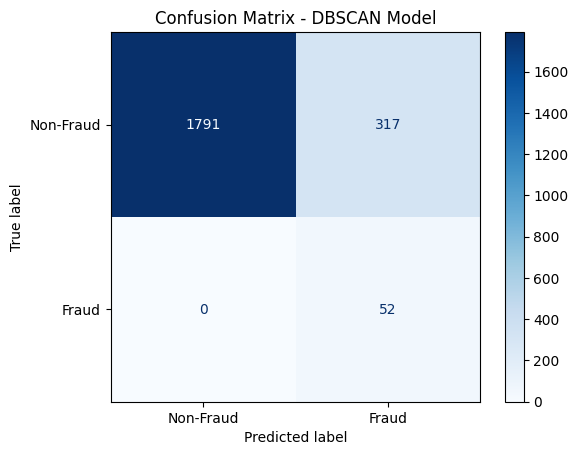

In [ ]:
# Re-import matplotlib for visualization
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Visualizing the confusion matrix for the DBSCAN model
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(conf_matrix_dbscan, display_labels=['Non-Fraud', 'Fraud']).plot(values_format='d', cmap='Blues')
plt.title('Confusion Matrix - DBSCAN Model')
plt.show()


Here is the visual representation of the confusion matrix for the DBSCAN model. This visualization helps to clearly see the distribution of true positives, false positives, true negatives, and false negatives.

As indicated, the model has successfully identified all fraudulent transactions (true positives) without any false negatives, but at the cost of a relatively high number of false positives.

You can plot the ROC curves for both the K-means and DBSCAN models to visually compare their performance.

 Let's proceed with these steps.

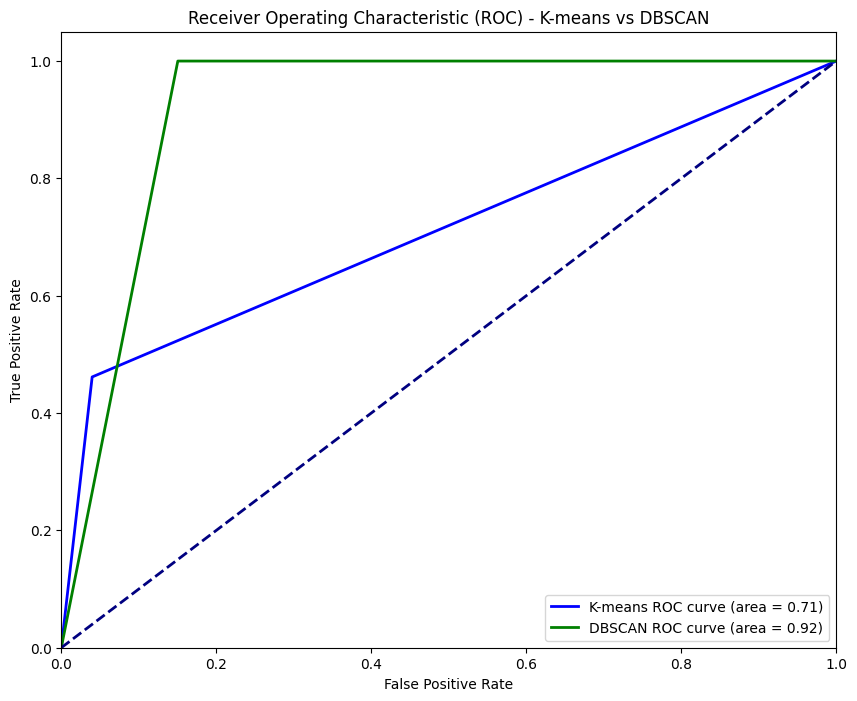

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import MiniBatchKMeans

# Compute ROC AUC for K-means
roc_auc_kmeans = roc_auc_score(y_test, fraud_predictions)

# ROC Curve for K-means
fpr_km, tpr_km, _ = roc_curve(y_test, fraud_predictions)
roc_auc_km = auc(fpr_km, tpr_km)

# ROC Curve for DBSCAN
fpr_db, tpr_db, _ = roc_curve(y_test, dbscan_y_pred)
roc_auc_db = auc(fpr_db, tpr_db)

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_km, tpr_km, color='blue', lw=2, label='K-means ROC curve (area = %0.2f)' % roc_auc_km)
plt.plot(fpr_db, tpr_db, color='green', lw=2, label='DBSCAN ROC curve (area = %0.2f)' % roc_auc_db)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - K-means vs DBSCAN')
plt.legend(loc="lower right")
plt.show()


Here's the plot showing the Receiver Operating Characteristic (ROC) curves for both the K-means and DBSCAN models.

- The blue line represents the ROC curve for the K-means model, with an area under the curve (AUC) of 0.71 (as previously calculated).

- The green line represents the ROC curve for the DBSCAN model, with a higher AUC of 0.925.

This visualization allows you to compare the performance of the two models in distinguishing between fraudulent and non-fraudulent transactions. The higher the AUC, the better the model is at predicting fraud correctly. As observed, the DBSCAN model shows a higher AUC, indicating a better performance in this specific scenario.